<a href="https://colab.research.google.com/github/mharrisonbaker/CUNYassignments/blob/master/DATA602_asssign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 5

In [0]:
#import packages
import numpy as np
import pandas as pd
import requests
import json
import datetime
import matplotlib.pyplot as plt
from collections import namedtuple


In [0]:
#static api inputs
dsapikey="2f729f7c79aae0809ccd38a998b4a4bc"
nyclat="42.3601"
nyclong="-71.0589"
exclude = "currently, minutely, hourly, flags"
time="1551441600"
dsurl = f'https://api.darksky.net/forecast/{dsapikey}/{nyclat},{nyclong},{time}?exclude={exclude}'






In [0]:
#check out the api return
response = requests.get(dsurl)
dictionary = json.dumps(response.json(), sort_keys = True, indent = 4)
print(dictionary)



{
    "daily": {
        "data": [
            {
                "apparentTemperatureHigh": 34.64,
                "apparentTemperatureHighTime": 1551473460,
                "apparentTemperatureLow": 23.89,
                "apparentTemperatureLowTime": 1551529680,
                "apparentTemperatureMax": 34.64,
                "apparentTemperatureMaxTime": 1551473460,
                "apparentTemperatureMin": 15.43,
                "apparentTemperatureMinTime": 1551430440,
                "cloudCover": 0.47,
                "dewPoint": 11.42,
                "humidity": 0.47,
                "icon": "partly-cloudy-day",
                "moonPhase": 0.86,
                "ozone": 334.5,
                "precipAccumulation": 0.11,
                "precipIntensity": 0.0005,
                "precipIntensityMax": 0.0017,
                "precipIntensityMaxTime": 1551455700,
                "precipProbability": 0.07,
                "precipType": "snow",
                "pressure": 1027.4,


In [0]:
#format into dataframe
response_json = response.json()
df = pd.DataFrame(response_json['daily']['data'])
print(response_json)
df.head()

{'latitude': 42.3601, 'longitude': -71.0589, 'timezone': 'America/New_York', 'daily': {'data': [{'time': 1546232400, 'summary': 'Rain in the evening and overnight.', 'icon': 'rain', 'sunriseTime': 1546258500, 'sunsetTime': 1546291320, 'moonPhase': 0.84, 'precipIntensity': 0.0085, 'precipIntensityMax': 0.0975, 'precipIntensityMaxTime': 1546315200, 'precipProbability': 0.86, 'precipType': 'rain', 'temperatureHigh': 44.12, 'temperatureHighTime': 1546286340, 'temperatureLow': 36.44, 'temperatureLowTime': 1546313700, 'apparentTemperatureHigh': 39.41, 'apparentTemperatureHighTime': 1546286460, 'apparentTemperatureLow': 30.07, 'apparentTemperatureLowTime': 1546316820, 'dewPoint': 27.36, 'humidity': 0.67, 'pressure': 1025.9, 'windSpeed': 6.48, 'windGust': 24.58, 'windGustTime': 1546315200, 'windBearing': 197, 'cloudCover': 0.72, 'uvIndex': 1, 'uvIndexTime': 1546274820, 'visibility': 9.192, 'ozone': 282.8, 'temperatureMin': 30.77, 'temperatureMinTime': 1546232820, 'temperatureMax': 44.12, 'temp

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipType,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,humidity,pressure,windSpeed,windGust,windGustTime,windBearing,cloudCover,uvIndex,uvIndexTime,visibility,ozone,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1546232400,Rain in the evening and overnight.,rain,1546258500,1546291320,0.84,0.0085,0.0975,1546315200,0.86,rain,44.12,1546286340,36.44,1546313700,39.41,1546286460,30.07,1546316820,27.36,0.67,1025.9,6.48,24.58,1546315200,197,0.72,1,1546274820,9.192,282.8,30.77,1546232820,44.12,1546286340,27.06,1546232700,39.41,1546286460


In [0]:
df1 = []
features = ['ozone','temperatureMax', 'temperatureMin','time','uvIndex']
DailySummary = namedtuple("DailySummary", features)
for unix in range(1546300800, 1577836800, 86400):
    BASE_URL = "https://api.darksky.net/forecast/2f729f7c79aae0809ccd38a998b4a4bc/42.3601,-71.0589," + str(unix) + "?exclude=currently,flags,alerts,hourly"
    response = requests.get(BASE_URL)
    data = response.json()
    df = pd.DataFrame(data["daily"]["data"])
    df1.append(DailySummary(temperatureMin = df.at[0, 'temperatureMin'],
                            temperatureMax = df.at[0, 'temperatureMax'],
                            ozone = df.at[0, 'ozone'],
                            uvIndex = df.at[0, 'uvIndex'],
                            time = df.at[0, 'time']))
res = pd.DataFrame(df1, columns=features)
res.to_csv('year_2019.csv', index=False)

ERROR! Session/line number was not unique in database. History logging moved to new session 64


In [0]:
res.head()

,ozone,temperatureMax,temperatureMin,time,uvIndex
0,282.8,44.12,30.77,1546232400,1
1,260.0,57.47,35.07,1546318800,2
2,326.2,35.83,27.33,1546405200,1
3,292.2,45.34,30.31,1546491600,1
4,254.6,46.84,34.60,1546578000,2


Data Exploration

Import your dataset into your environment and explore your data. You should include any summary statistics, means, medians, quartiles, or any other relevant information about the dataset.

In [0]:

print(res)

In [0]:
#create new col
res["temp range"]=res['temperatureMax']-res['temperatureMin']



In [0]:
(res.mean(axis=0))

ozone             3.234934e+02
temperatureMax    5.958175e+01
temperatureMin    4.530597e+01
time              1.561955e+09
uvIndex           4.323288e+00
temp range        1.427578e+01
dtype: float64

In [0]:
res.median(axis=0)

ozone             3.211000e+02
temperatureMax    5.979000e+01
temperatureMin    4.575000e+01
time              1.561954e+09
uvIndex           4.000000e+00
temp range        1.381000e+01
dtype: float64

In [0]:
res=res.rename(columns={"temperatureMax": "max temp", "temperatureMin": "min temp"})
res['time'] = pd.to_datetime(res['time'], unit='s')
res

,ozone,max temp,min temp,time,uvIndex,temp range
0,282.8,44.12,30.77,2018-12-31 05:00:00,1,13.35
1,260.0,57.47,35.07,2019-01-01 05:00:00,2,22.40
2,326.2,35.83,27.33,2019-01-02 05:00:00,1,8.50
3,292.2,45.34,30.31,2019-01-03 05:00:00,1,15.03
4,254.6,46.84,34.60,2019-01-04 05:00:00,2,12.24
...,...,...,...,...,...,...
360,289.6,40.24,33.34,2019-12-26 05:00:00,1,6.90
361,290.9,51.73,34.39,2019-12-27 05:00:00,1,17.34
362,336.3,49.61,37.09,2019-12-28 05:00:00,1,12.52
363,317.1,42.24,34.64,2019-12-29 05:00:00,1,7.60


In [0]:
res.sort_values(by=['ozone', 'max temp'])

,ozone,max temp,min temp,time,uvIndex,temp range
38,242.5,40.23,33.49,2019-02-07 05:00:00,3,6.74
7,242.9,30.14,18.34,2019-01-07 05:00:00,2,11.80
295,244.1,57.65,50.14,2019-10-22 04:00:00,3,7.51
303,244.6,64.11,54.63,2019-10-30 04:00:00,3,9.48
302,244.8,56.47,50.85,2019-10-29 04:00:00,3,5.62
...,...,...,...,...,...,...
78,431.6,44.89,31.02,2019-03-19 04:00:00,3,13.87
31,437.5,16.72,3.13,2019-01-31 05:00:00,1,13.59
65,442.6,26.90,15.79,2019-03-06 05:00:00,3,11.11
67,449.2,37.68,16.58,2019-03-08 05:00:00,3,21.10


In [0]:
res[res['uvIndex']==4]

,ozone,max temp,min temp,time,uvIndex,temp range
53,277.1,45.45,35.72,2019-02-22 05:00:00,4,9.73
60,334.5,38.79,21.00,2019-03-01 05:00:00,4,17.79
70,357.6,50.55,35.61,2019-03-11 04:00:00,4,14.94
71,389.2,45.12,34.13,2019-03-12 04:00:00,4,10.99
72,358.6,40.84,28.97,2019-03-13 04:00:00,4,11.87
73,325.9,50.40,36.17,2019-03-14 04:00:00,4,14.23
74,295.0,62.30,41.86,2019-03-15 04:00:00,4,20.44
76,370.3,40.87,32.17,2019-03-17 04:00:00,4,8.70
77,418.8,42.97,27.34,2019-03-18 04:00:00,4,15.63
79,414.4,49.41,31.53,2019-03-20 04:00:00,4,17.88


In [0]:
print(res.groupby(["time"])["ozone"].min())
print(res.groupby(["time"])["ozone"].max())

time
2018-12-31 05:00:00    282.8
2019-01-01 05:00:00    260.0
2019-01-02 05:00:00    326.2
2019-01-03 05:00:00    292.2
2019-01-04 05:00:00    254.6
                       ...  
2019-12-26 05:00:00    289.6
2019-12-27 05:00:00    290.9
2019-12-28 05:00:00    336.3
2019-12-29 05:00:00    317.1
2019-12-30 05:00:00    316.8
Name: ozone, Length: 365, dtype: float64
time
2018-12-31 05:00:00    282.8
2019-01-01 05:00:00    260.0
2019-01-02 05:00:00    326.2
2019-01-03 05:00:00    292.2
2019-01-04 05:00:00    254.6
                       ...  
2019-12-26 05:00:00    289.6
2019-12-27 05:00:00    290.9
2019-12-28 05:00:00    336.3
2019-12-29 05:00:00    317.1
2019-12-30 05:00:00    316.8
Name: ozone, Length: 365, dtype: float64



Data Wrangling (above)

Create a subset of your original data and perform the following.

• Use .rename() on multiple columns. Take note of inplace=True.

• Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

• Create a new column based on existing columns or calculations. For example, you have two columns: city and state. You create a new column called location that consists of city and state.

• Drop column(s) from your dataset.

• Sort your data based on multiple variables.

• Filter your data based on some condition.

• Apply multiple aggregation functions to your data (count, mean, min, max). Use the .groupby() and .agg() or .apply() functions if needed.



Data Visualization

Use pandas to create a data visualization of your choosing on your dataset.


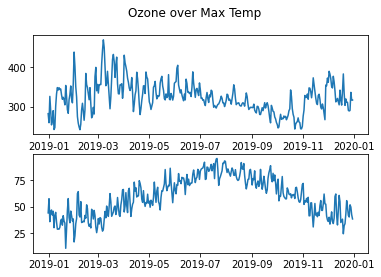

In [0]:
y=res['max temp']
fig, axs = plt.subplots(2)
fig.suptitle('Ozone over Max Temp')
axs[0].plot(res.time, res.ozone)
axs[1].plot(res.time, y)


Conclusions

Provide some conclusions or insight gained from looking at your data.


In [0]:
It looks like Ozone peaks in the winter months, which are the coolest months.